script from here

https://www.geeksforgeeks.org/scraping-indeed-job-data-using-python/

In [89]:
# import module
import pandas as pd
import numpy as np
import re

path = r'C:\Users\goldsby_c\OneDrive - Pearson PLC\Add-hoc analysis projects\Indeed_job_data\output\indeed_jobs_scan.xlsx'
df = pd.read_excel(path)
df


,Unnamed: 0,job_title,company_name,company_location,salary
0,0,Data Science Analyst (Remote),Yelp,Remote in London,No Salary provided
1,1,Junior Data Scientist / Analyst,EDF Trading,London,No Salary provided
2,2,Data Analyst (1 year Fixed Term),LSE Jobs,London WC2A,"£37,197 - £44,802 a year"
3,3,Data Analyst,Motorway,London,No Salary provided
4,4,Product Data Analyst,Metrica Recruitment,North London,"£50,000 - £60,000 a year"
...,...,...,...,...,...
1000,1000,Tax Analyst - Research & Development,Brook Street,Remote in England,"£22,000 - £26,000 a year"
1001,1001,Assistant DevOps Engineer,Achilles Therapeutics,Hammersmith W6,No Salary provided
1002,1002,Salesforce Solutions Architect - FS,PwC,London,No Salary provided
1003,1003,Paediatrics Occupational Therapist,justot,London,"£32,000 - £35,000 a year"


### de-dup

In [90]:
df = df.drop('Unnamed: 0', axis=1).drop_duplicates()

### cleanup salary

- extract 'year/hour' and push to new column

- Get monitory figures, average if two figures, push to new columm

In [91]:
df['salary_time'] = df['salary'].str.extract('(year|hour)', flags=re.IGNORECASE)
df

,job_title,company_name,company_location,salary,salary_time
0,Data Science Analyst (Remote),Yelp,Remote in London,No Salary provided,NaN
1,Junior Data Scientist / Analyst,EDF Trading,London,No Salary provided,NaN
2,Data Analyst (1 year Fixed Term),LSE Jobs,London WC2A,"£37,197 - £44,802 a year",year
3,Data Analyst,Motorway,London,No Salary provided,NaN
4,Product Data Analyst,Metrica Recruitment,North London,"£50,000 - £60,000 a year",year
...,...,...,...,...,...
738,Senior Data Scientist,BP,London EC3N 3AX,No Salary provided,NaN
755,Data Engineer/ Developer Analyst,BP,London EC3N 3AX,No Salary provided,NaN
776,Specialty - Head of Software Development,Gallagher,London,No Salary provided,NaN
804,Global Customer Operations Product Owner,BP,London EC3N 3AX,No Salary provided,NaN


### get salarys

In [92]:
# extract salaries
sal_df = df['salary'].str.findall(r'(?:£)(\d+[,.]\d+)').apply(pd.Series).replace('[,.]', '', regex=True).rename({0:'sal_min', 1:'sal_max'}, axis=1)
# find average
sal_df['ave_salary'] = (pd.to_numeric(sal_df['sal_min'], errors='coerce').astype('Int64') + pd.to_numeric(sal_df['sal_max'], errors='coerce').astype('Int64')) / 2

sal_df

,sal_min,sal_max,ave_salary
0,NaN,NaN,<NA>
1,NaN,NaN,<NA>
2,37197,44802,40999.5
3,NaN,NaN,<NA>
4,50000,60000,55000.0
...,...,...,...
738,NaN,NaN,<NA>
755,NaN,NaN,<NA>
776,NaN,NaN,<NA>
804,NaN,NaN,<NA>


### merge dataset

In [93]:
df_final = pd.concat([df, sal_df], axis=1)
df_final

,job_title,company_name,company_location,salary,salary_time,sal_min,sal_max,ave_salary
0,Data Science Analyst (Remote),Yelp,Remote in London,No Salary provided,NaN,NaN,NaN,<NA>
1,Junior Data Scientist / Analyst,EDF Trading,London,No Salary provided,NaN,NaN,NaN,<NA>
2,Data Analyst (1 year Fixed Term),LSE Jobs,London WC2A,"£37,197 - £44,802 a year",year,37197,44802,40999.5
3,Data Analyst,Motorway,London,No Salary provided,NaN,NaN,NaN,<NA>
4,Product Data Analyst,Metrica Recruitment,North London,"£50,000 - £60,000 a year",year,50000,60000,55000.0
...,...,...,...,...,...,...,...,...
738,Senior Data Scientist,BP,London EC3N 3AX,No Salary provided,NaN,NaN,NaN,<NA>
755,Data Engineer/ Developer Analyst,BP,London EC3N 3AX,No Salary provided,NaN,NaN,NaN,<NA>
776,Specialty - Head of Software Development,Gallagher,London,No Salary provided,NaN,NaN,NaN,<NA>
804,Global Customer Operations Product Owner,BP,London EC3N 3AX,No Salary provided,NaN,NaN,NaN,<NA>


### Fill blank ave_salary with the median - CONDITIONAL step

In [94]:
# df_final['ave_salary'] = df_final['ave_salary'].fillna(df_final['ave_salary'].median())

## Analysis full time jobs

#### Salary

(43, 8)


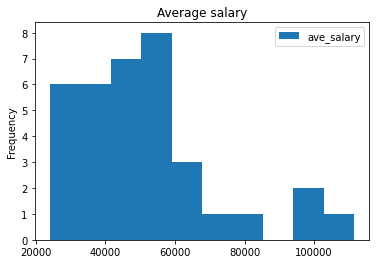

In [95]:
print(df_final.query("salary_time == 'year'").shape)
df_final.query("salary_time == 'year' & ave_salary == ave_salary").plot(kind='hist', title='Average salary');

(43, 8)


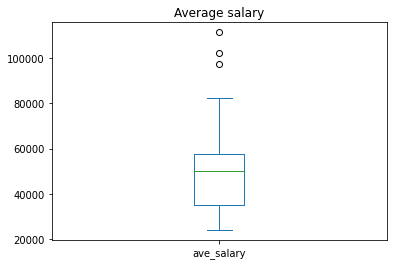

In [96]:
print(df_final.query("salary_time == 'year'").shape)
df_final.query("salary_time == 'year' & ave_salary == ave_salary").plot(kind='box', title='Average salary');

In [97]:
df_final.describe()

,ave_salary
count,35.000000
mean,51862.357143
std,20990.441332
min,24000.000000
25%,35000.000000
50%,50000.000000
75%,57500.000000
max,111500.000000


## Analysis contract type jobs

#### Salary

(0, 8)


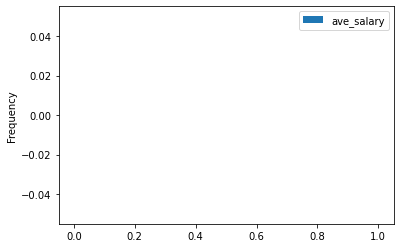

In [98]:
print(df_final.query("salary_time == 'hour'").shape)
df_final.query("salary_time == 'hour' & ave_salary == ave_salary").plot(kind='hist');

(0, 8)


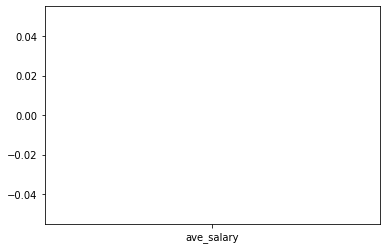

In [99]:
print(df_final.query("salary_time == 'hour'").shape)
df_final.query("salary_time == 'hour' & ave_salary == ave_salary").plot(kind='box');

### Company